# **WARNING**

In order for this notebook to run, you must first run the notebook `2_0_generate_turn_data.ipynb` and generate the file `result/singlegame_results/player10_turn_results.csv` which contains the optimal policy and value functions for the solved MDPs for different player skill model and epsilon combinatinos. It is also important to make sure that all combinations you want to analyse in this file were generated during this process. 

# 1.0 Notebook Parameters

Please specify the following variables:
1. `project_directory`: your project directory path
2. `epsilon_list`: the list of execution error multiplers (epsilon) that you want to consider in your analysis.
3. `player_id`: the players (i.e. skill model) you want to consider in your analysis; use one base model and scale it with different epsilons; this should match whatever was used in `1_0_generate_noturn_data.ipynb`.
4. `default_iterations`: the number of iterations that should be used for each simulation run. 

In [1]:
# Change this to the project directory path for your computer  
project_directory = '/Users/rachael/Desktop/darts-thesis'
project_directory = '/Users/Craig/PycharmProjects/darts-thesis'

# Set the epsilons that will be considered in this analysis 
epsilon_list = [1,2,3,4,5,6,7,8,9]

# Set the ID of the player skill models you want to use 
    # 10 - symmetric DB skill model that we were using up until now 
    # ? - "average pro" skill model generated by H & W 
player_id = 'AVG'

# Set the number of iterations you want to use in your simulations
default_iterations = 100


# 2.0 Notebook Setup

Import libraries and run prerequisites.

In [2]:
# Import and configure modules from this project

import os

os.chdir(project_directory)

import function_init_simple_mdp as imdp
import function_helpers_singleplayer as h

import function_tool as ft 

import class_handicap as hc 
handicap = hc.Handicap(results_file_name='./result/singlegame_results/playerAVG_turn_results.csv', epsilon_list = epsilon_list)

from class_simulator_turn import Simulator

In [3]:
# Import and configure external modules 

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm, colors
import seaborn as sns

import statistics



In [4]:
# Helper functions

def color_map_color(value, cmap_name='Wistia', vmin=0, vmax=1):
    # norm = plt.Normalize(vmin, vmax)
    norm = colors.Normalize(vmin=vmin, vmax=vmax)
    cmap = cm.get_cmap(cmap_name)  # PiYG
    rgb = cmap(norm(abs(value)))[:3]  # will return rgba, we take only first 3 so we get rgb
    color = colors.rgb2hex(rgb)
    return color

In [5]:
# Initialize Simulators for different e (takes about 5 minutes to run for 9 epsilon values)

sim_list = []

for epsilon in epsilon_list:
    
    sim_list.append(Simulator(player_num=player_id,epsilon=epsilon))


load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_no_tokens/playerAVG_e1_gaussin_prob_grid_custom_no_tokens.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_tokens/t_gaussin_prob_grid_custom_tokens.pkl


C:\Users\Craig\PycharmProjects\darts-thesis\function_helpers_singleplayer.py:761: RuntimeWarning: divide by zero encountered in true_divide
  num_tothrow = num_tothrow / prob_otherstate
C:\Users\Craig\PycharmProjects\darts-thesis\function_helpers_singleplayer.py:761: RuntimeWarning: overflow encountered in true_divide
  num_tothrow = num_tothrow / prob_otherstate
C:\Users\Craig\PycharmProjects\darts-thesis\function_helpers_singleplayer.py:799: RuntimeWarning: divide by zero encountered in true_divide
  num_tothrow = num_tothrow / prob_otherstate
C:\Users\Craig\PycharmProjects\darts-thesis\function_helpers_singleplayer.py:799: RuntimeWarning: overflow encountered in true_divide
  num_tothrow = num_tothrow / prob_otherstate
C:\Users\Craig\PycharmProjects\darts-thesis\function_helpers_singleplayer.py:1218: RuntimeWarning: divide by zero encountered in true_divide
  num_turns_array[:,score_gained_index] = num_turns_array[:,score_gained_index] / prob_notbust_dic_nt[score_max]
C:\Users\Craig

solve prob_policy_transit in 1.5702462196350098 seconds
solve dp_turn_policyiter in 14.527672529220581 seconds
[[0.     0.     1.7753 ... 5.8006 5.7975 5.8203]
 [0.     0.     1.     ... 5.079  5.0774 5.0926]
 [0.     0.     1.     ... 4.8361 4.8371 4.8479]
 ...
 [0.     0.     1.     ... 3.8317 3.8327 3.8341]
 [0.     0.     1.     ... 3.5819 3.5819 3.5819]
 [0.     0.     1.     ... 3.     3.     3.    ]]
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_no_tokens/playerAVG_e2_gaussin_prob_grid_custom_no_tokens.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_tokens/t_gaussin_prob_grid_custom_tokens.pkl
solve prob_policy_transit in 2.1108057498931885 seconds
solve dp_turn_policyiter in 15.850177526473999 seconds
[[0.     0.     2.4054 ... 7.6096 7.6209 7.6342]
 [0.     0.     1.     ... 6.3557 6.3661 6.3794]
 [0.     0.     1.     ... 5.9407 5.9508 5.9643]
 ...
 [0.     0.     1.     ... 4.0235 4.0313 4.041 ]
 [0.     0.     1.     ... 3.7253 3.7318

# 3.0 Run Simulations 

Takes about 1 hour for 10,000 iterations. If you have already run this before, you can load `simulation_path_turn_results.pkl` at the bottom of this section to save time.

In [14]:
########################## PARAMETERS ###################################

iterations = default_iterations

#########################################################################

sim_paths = {}


for e1 in epsilon_list:

    sim_paths[e1] = {}

    # Baseline 
    i1 = epsilon_list.index(e1)
    sim = sim_list[i1]
    sim_paths[e1]['baseline'] = sim.run_simulation(iterations, starting_score=501, starting_credits=0, spot_darts=0, spot_points=0)

    for e0 in epsilon_list:
        
        if e1 <= e0:

            i0 = epsilon_list.index(e0)
            sim = sim_list[i0]

            sim_paths[e1][e0] = {}

            spot_points_heuristic = handicap.get_spot_point_heuristic_handicap(e1,e0)
            spot_points_optimal = handicap.get_spot_point_optimal_handicap(e1,e0)
            credits, credits_lower, credits_higher, threshold_higher_multiplier = handicap.get_dynamic_credits_handicap(e1,e0)
            threshold_higher = int(round(iterations * threshold_higher_multiplier))

            sim_paths[e1][e0]['spot_point_heuristic'] = sim.run_simulation(iterations, starting_score=501, starting_credits=0, spot_darts=0, spot_points=spot_points_heuristic)
            sim_paths[e1][e0]['spot_point_optimal'] = sim.run_simulation(iterations, starting_score=501, starting_credits=0, spot_darts=0, spot_points=spot_points_optimal)
            sim_paths[e1][e0]['dynamic_credits'] = sim.run_simulation(threshold_higher, starting_score=501, starting_credits=credits_higher, spot_darts=0, spot_points=0)
            sim_paths[e1][e0]['dynamic_credits'].extend(sim.run_simulation(iterations - threshold_higher, starting_score=501, starting_credits=credits_lower, spot_darts=0, spot_points=0))
            
            # Limit paths to turns 
            for iter in range(len(sim_paths[e1]['baseline'])):
                sim_paths[e1][e0]['spot_point_heuristic'][iter] = [x for x in sim_paths[e1][e0]['spot_point_heuristic'][iter] if x[2]==3]
                sim_paths[e1][e0]['spot_point_optimal'][iter] = [x for x in sim_paths[e1][e0]['spot_point_optimal'][iter] if x[2]==3]
                sim_paths[e1][e0]['dynamic_credits'][iter] = [x for x in sim_paths[e1][e0]['dynamic_credits'][iter] if x[2]==3]
                sim_paths[e1]['baseline'][iter] = [x for x in sim_paths[e1]['baseline'][iter] if x[2]==3]



Ran in 0.060s.


TypeError: cannot unpack non-iterable numpy.float64 object

In [ ]:
### SAVE RESULTS 

# Save results to pickle so don't need to rerun every time (takes ~1 hour for 10,000 iterations)
ft.dump_pickle('result/singlegame_simulation_results/simulation_path_turn_results.pkl', sim_paths)



In [9]:
### LOAD RESULTS 

sim_paths = ft.load_pickle('result/singlegame_simulation_results/simulation_path_turn_results.pkl')

# 4.0 Single Distribution Plot for Different Epsilons

Examine how simulated outcome distribution varies with epsilon.

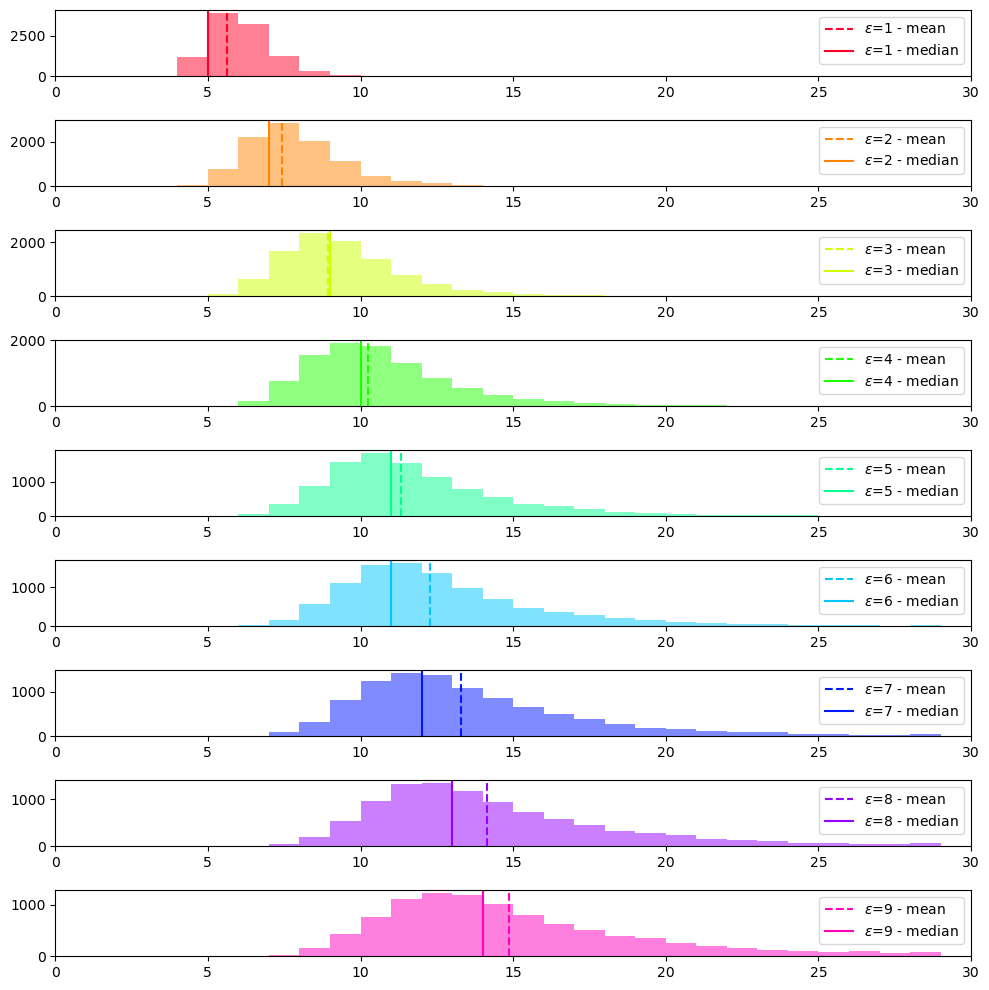

In [16]:
############### PARAMETERS ###############

# Axis limits
xmin=0
xmax=30

##########################################


fig, ax = plt.subplots(9, figsize=(10,10))

vmax=max(epsilon_list)
vmin=min(epsilon_list)

handicap_list = ['spot_point_heuristic','spot_point_optimal','dynamic_credits']

row = 0 

for e1 in epsilon_list:

    # Extract data and colors 
    data1 = [len(x) for x in sim_paths[e1]['baseline']]
    #data1 = [len(x) for x in dist_paths[e1][0]]
    color1 = color_map_color(e1, cmap_name='gist_rainbow', vmin=vmin, vmax=vmax)

    # Plot baseline 
    ax[row].hist(np.array(data1),color=color1,alpha=0.5,bins=list(range(1,30)))
    ax[row].axvline(statistics.mean(data1),color=color1,linestyle='dashed')
    ax[row].axvline(statistics.median(data1),color=color1)
        
    ax[row].set_xlim((xmin,xmax))

    ax[row].legend([f'$\epsilon$={e1} - mean',f'$\epsilon$={e1} - median'])

    row = row + 1 

# fig.suptitle(f"Distributions for stronger player with $\epsilon$= {e1}")
# ax[0,0].title.set_text('No Handicap')
# ax[0,1].title.set_text('Hueristic Spot Point')
# ax[0,2].title.set_text('Optimized Spot Point')
# ax[0,3].title.set_text('Dynamic Credits')
fig.tight_layout()

Ran in 9.088s.
Ran in 7.148s.
Ran in 6.803s.
Ran in 6.103s.
Ran in 5.641s.
Ran in 4.995s.
Ran in 4.395s.
Ran in 3.785s.
Ran in 3.213s.
Ran in 2.534s.


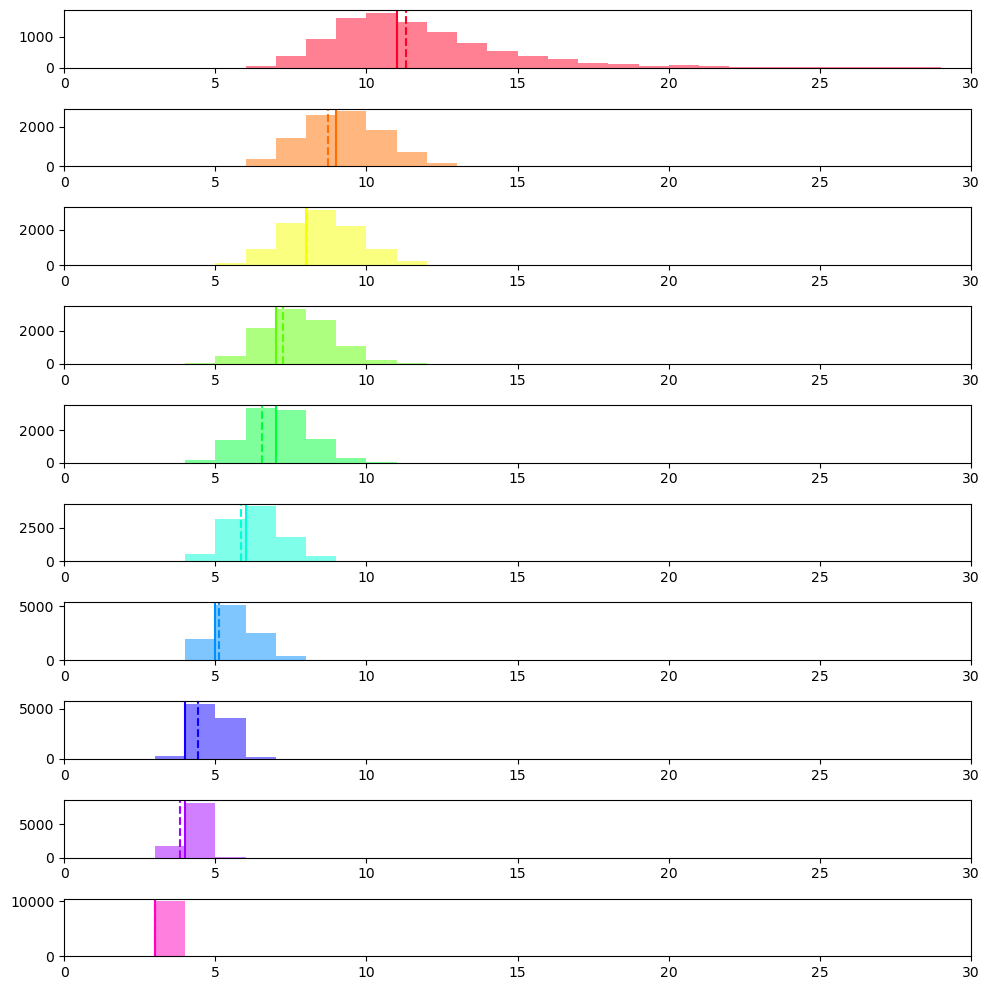

In [18]:
############### PARAMETERS ###############

# Epsilon you want to hold constant as you vary tokens 
e1 = 5

# Axis limits
xmin=0
xmax=30

##########################################

e_beta_res = []

fig, ax = plt.subplots(10, figsize=(10,10))

# List of betas
b_list = list(range(10))

# Get max and min for color values
vmax=max(b_list)
vmin=min(b_list)

# Placeholders for iteration 
row = 0 
sim = sim_list[e1-1]

for beta in b_list:

    # Run the simulation 
    res = sim.run_simulation(10000, starting_score=501, starting_credits=beta, spot_darts=0, spot_points=0)

    # Limit paths to turns 
    for iter in range(len(res)):
        res[iter] = [x for x in res[iter] if x[2]==3]

    # Record results 
    e_beta_res.append(data1)
    
    # Extract data and colors 
    data1 = [len(x) for x in res]
    color1 = color_map_color(beta, cmap_name='gist_rainbow', vmin=vmin, vmax=vmax)

    # Plot 
    ax[row].hist(np.array(data1),color=color1,alpha=0.5,bins=list(range(1,30)))
    ax[row].axvline(statistics.mean(data1),color=color1,linestyle='dashed')
    ax[row].axvline(statistics.median(data1),color=color1)
    
    # Set axis limits
    ax[row].set_xlim((xmin,xmax))

    # Legend 
    # ax[row].legend([f'$\epsilon$={e1} - mean',f'$\epsilon$={e1} - median'])

    row = row + 1 

fig.tight_layout()

# 5.0 Handicap Comparison Graphs

Change the value of the stronger player's epsilon `stronger_e` to get different comparisons. The default is to handicap all weaker epsilons against a professional caliber player with $\epsilon=1$. 

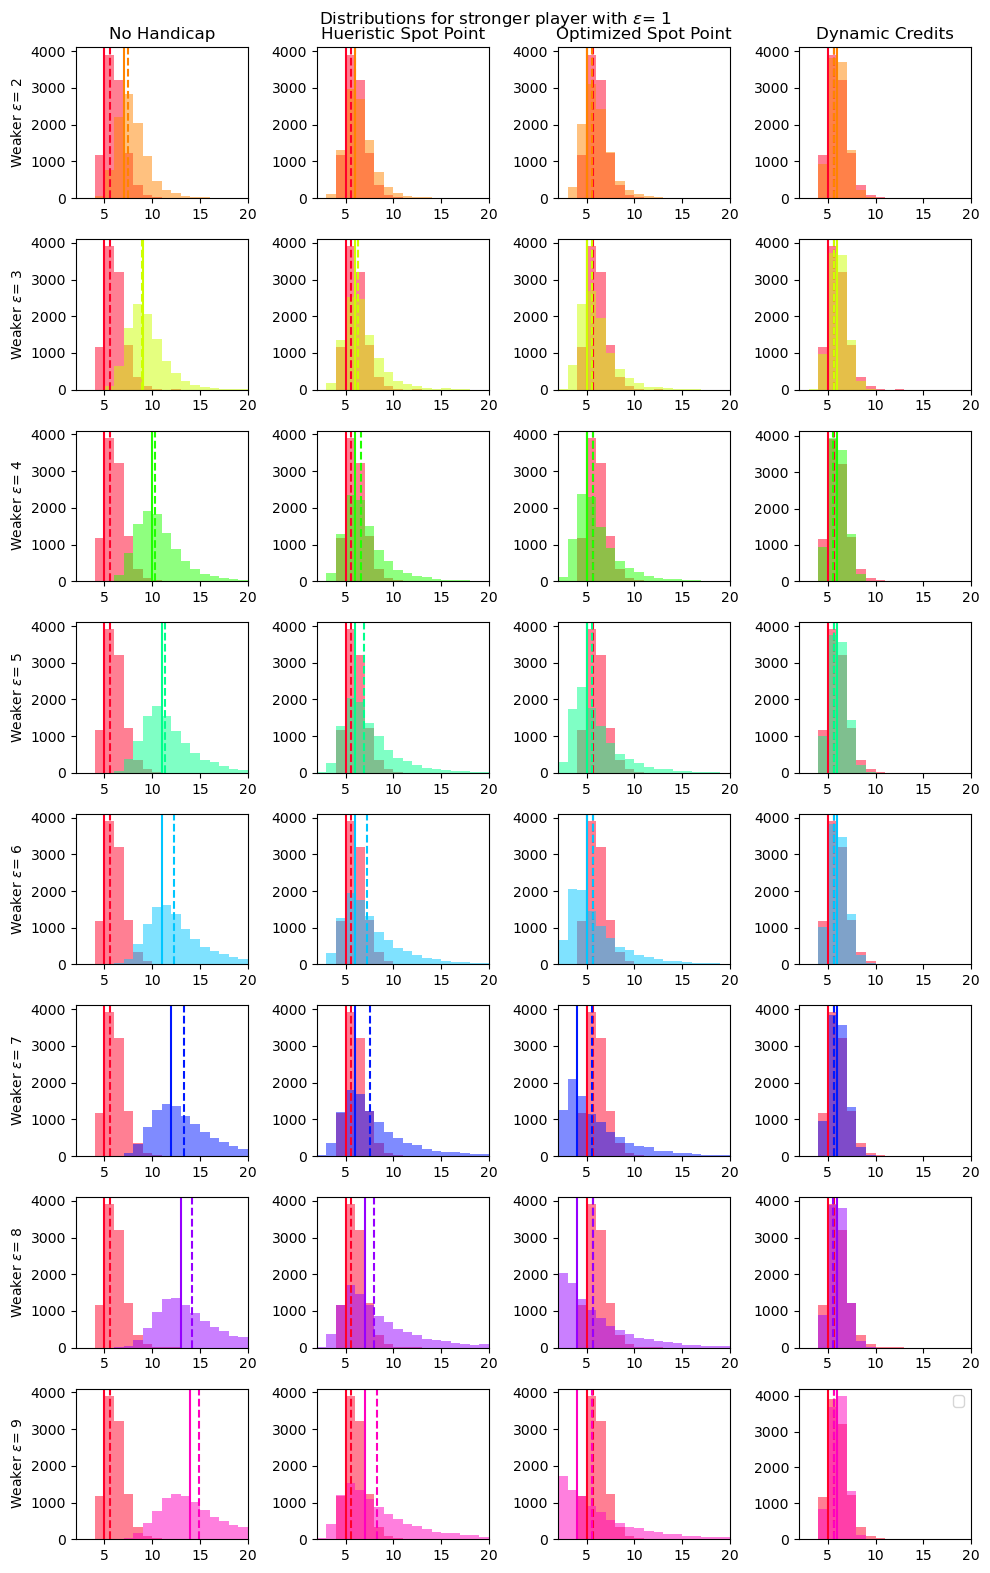

In [19]:
############### PARAMETERS ###############

# Epsilon of stronger player
stronger_e = 1

# Axis limits
xmin = 2
xmax = 20

##########################################

# Calculate the number of rows required for the plot 
num_rows = len(epsilon_list) - stronger_e

# Set up figure and axis objects
fig, ax = plt.subplots(num_rows, 4, figsize=(10,num_rows*2))

# Placeholder for iteration
sim_lengths = []
row = 0 

# Calculation for getting plot colors
vmax=max(epsilon_list)
vmin=min(epsilon_list)

# List of handicaps 
handicap_list = ['spot_point_heuristic','spot_point_optimal','dynamic_credits']


# For the stronger epsilon
for e1 in [stronger_e]:

    # Iterate through all other epsilons
    for e0 in epsilon_list:
        
        # Check if it's weeker 
        if e1 < e0:

            #print(f'Completed for {e1} and {e0}')

            # Extract data and colors 
            data1 = [len(x) for x in sim_paths[e1]['baseline']]
            data0 = [len(x) for x in sim_paths[e0]['baseline']]
            color1 = color_map_color(e1, cmap_name='gist_rainbow', vmin=vmin, vmax=vmax)
            color0 = color_map_color(e0, cmap_name='gist_rainbow', vmin=vmin, vmax=vmax)

            # Plot baseline 
            ax[row,0].hist(np.array(data1),color=color1,alpha=0.5,bins=list(range(1,30)))
            ax[row,0].axvline(statistics.mean(data1),color=color1,linestyle='dashed')
            ax[row,0].axvline(statistics.median(data1),color=color1)
            ax[row,0].hist(np.array(data0),color=color0,alpha=0.5,bins=list(range(1,30)))
            ax[row,0].axvline(statistics.mean(data0),color=color0,linestyle='dashed')
            ax[row,0].axvline(statistics.median(data0),color=color0)
             
            ax[row,0].set_xlim((xmin,xmax))
            ax[row,0].set_ylabel(f'Weaker $\epsilon$= {e0}')  

            plt.legend([f'{e1} - mean',f'{e1} - median',f'{e0} - mean',f'{e0} - median'])
            
            # Plot handicaps 

            for j in range(len(handicap_list)):

                data0 = [len(x) for x in sim_paths[e1][e0][handicap_list[j]]]
                col = j+1 

                ax[row,col].hist(np.array(data1),color=color1,alpha=0.5,bins=list(range(1,30)))
                ax[row,col].axvline(statistics.mean(data1),color=color1,linestyle='dashed')
                ax[row,col].axvline(statistics.median(data1),color=color1)
                ax[row,col].hist(np.array(data0),color=color0,alpha=0.5,bins=list(range(1,30)))
                ax[row,col].axvline(statistics.mean(data0),color=color0,linestyle='dashed')
                ax[row,col].axvline(statistics.median(data0),color=color0)
                
                ax[row,col].set_xlim((xmin,xmax))
                

            row = row + 1 

# Titles, etc. 
fig.suptitle(f"Distributions for stronger player with $\epsilon$= {e1}")
ax[0,0].title.set_text('No Handicap')
ax[0,1].title.set_text('Hueristic Spot Point')
ax[0,2].title.set_text('Optimized Spot Point')
ax[0,3].title.set_text('Dynamic Credits')
fig.tight_layout()



# 6.0 Handicap Sandbox

In this section, you can generate a single graph to compare all handicap options for a single chosen pair of epsilons. 

The first sandbox produces a graph for all four handicap options (no handicap, heuristic spot point, optimized spot point, dynamic credits). The second graph omits dynamic credits and can be used as a staging graph in presentations.

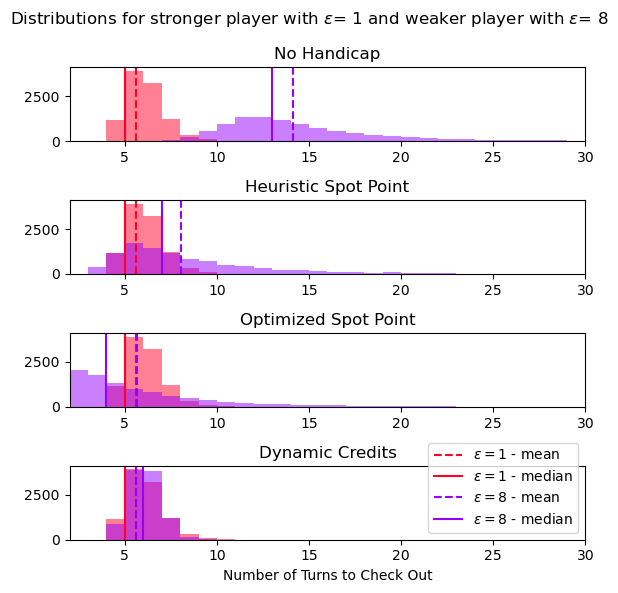

In [25]:
############### PARAMETERS ###############

# Epsilon of two players
stronger_e = 1 
weaker_e = 8

# Axis limits
xmin = 2
xmax = 30

##########################################

# Set up figure and axis objects
fig, ax = plt.subplots(4, 1, figsize=(6,6))

# Placehodler for iteration
sim_lengths = []

# Compute max and min to get colors for each epsilon 
vmax=max(epsilon_list)
vmin=min(epsilon_list)

# List of possible handicaps
handicap_list = ['spot_point_heuristic','spot_point_optimal','dynamic_credits']

# Extract data and colors 
data1 = [len(x) for x in sim_paths[e1]['baseline']]
data0 = [len(x) for x in sim_paths[e0]['baseline']]
color1 = color_map_color(e1, cmap_name='gist_rainbow', vmin=vmin, vmax=vmax)
color0 = color_map_color(e0, cmap_name='gist_rainbow', vmin=vmin, vmax=vmax)

# Plot baseline 
ax[0].hist(np.array(data1),color=color1,alpha=0.5,bins=list(range(1,30)))
ax[0].axvline(statistics.mean(data1),color=color1,linestyle='dashed')
ax[0].axvline(statistics.median(data1),color=color1)
ax[0].hist(np.array(data0),color=color0,alpha=0.5,bins=list(range(1,30)))
ax[0].axvline(statistics.mean(data0),color=color0,linestyle='dashed')
ax[0].axvline(statistics.median(data0),color=color0)
    
ax[0].set_xlim((xmin,xmax))
#ax[0].set_ylabel(f'Weaker $\epsilon$= {e0}')  
#ax[0].legend([f'$\epsilon=${e1} - mean',f'$\epsilon=${e1} - median',f'$\epsilon=${e0} - mean',f'$\epsilon=${e0} - median'])

# Plot handicaps 
for j in range(len(handicap_list)):

    data0 = [len(x) for x in sim_paths[e1][e0][handicap_list[j]]]
    col = j+1 

    ax[col].hist(np.array(data1),color=color1,alpha=0.5,bins=list(range(1,30)))
    ax[col].axvline(statistics.mean(data1),color=color1,linestyle='dashed')
    ax[col].axvline(statistics.median(data1),color=color1)
    ax[col].hist(np.array(data0),color=color0,alpha=0.5,bins=list(range(1,30)))
    ax[col].axvline(statistics.mean(data0),color=color0,linestyle='dashed')
    ax[col].axvline(statistics.median(data0),color=color0)
    
    ax[col].set_xlim((xmin,xmax))

# Legend, axis labels
ax[3].legend([f'$\epsilon=${e1} - mean',f'$\epsilon=${e1} - median',f'$\epsilon=${e0} - mean',f'$\epsilon=${e0} - median'],loc='best')
ax[3].set_xlabel(f'Number of Turns to Check Out')  

# Titles 
fig.suptitle(f"Distributions for stronger player with $\epsilon$= {e1} and weaker player with $\epsilon$= {e0}")
ax[0].title.set_text('No Handicap')
ax[1].title.set_text('Heuristic Spot Point')
ax[2].title.set_text('Optimized Spot Point')
ax[3].title.set_text('Dynamic Credits')

fig.tight_layout()

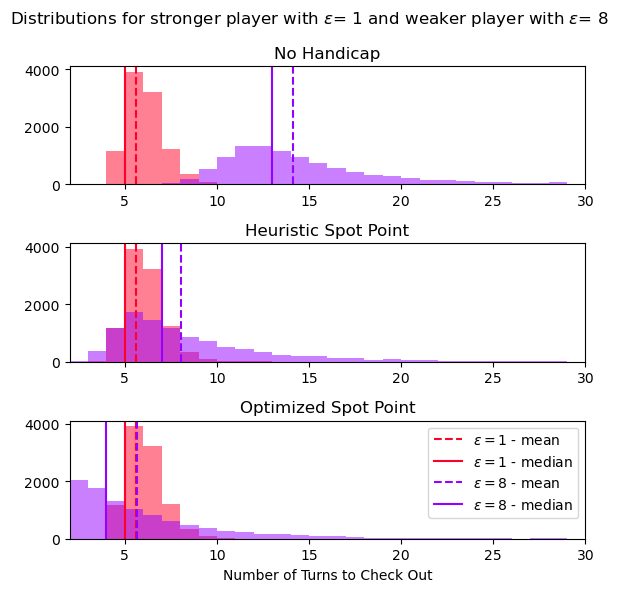

In [27]:
############### PARAMETERS ###############

# Epsilon of two players
stronger_e = 1 
weaker_e = 8

# Axis limits
xmin = 2
xmax = 30

##########################################

# Set up figure and axis objects
fig, ax = plt.subplots(3, 1, figsize=(6,6))

# Placehodler for iteration
sim_lengths = []

# Compute max and min to get colors for each epsilon 
vmax=max(epsilon_list)
vmin=min(epsilon_list)

# List of possible handicaps
handicap_list = ['spot_point_heuristic','spot_point_optimal']#,'dynamic_credits']

#print(f'Completed for {e1} and {e0}')

# Extract data and colors 
data1 = [len(x) for x in sim_paths[e1]['baseline']]
data0 = [len(x) for x in sim_paths[e0]['baseline']]
color1 = color_map_color(e1, cmap_name='gist_rainbow', vmin=vmin, vmax=vmax)
color0 = color_map_color(e0, cmap_name='gist_rainbow', vmin=vmin, vmax=vmax)

# Plot baseline 
ax[0].hist(np.array(data1),color=color1,alpha=0.5,bins=list(range(1,30)))
ax[0].axvline(statistics.mean(data1),color=color1,linestyle='dashed')
ax[0].axvline(statistics.median(data1),color=color1)
ax[0].hist(np.array(data0),color=color0,alpha=0.5,bins=list(range(1,30)))
ax[0].axvline(statistics.mean(data0),color=color0,linestyle='dashed')
ax[0].axvline(statistics.median(data0),color=color0)

# Axis limits, legend, etc.
ax[0].set_xlim((xmin,xmax))
#ax[0].set_ylabel(f'Weaker $\epsilon$= {e0}')  
#ax[0].legend([f'$\epsilon=${e1} - mean',f'$\epsilon=${e1} - median',f'$\epsilon=${e0} - mean',f'$\epsilon=${e0} - median'])

# Plot handicaps 
for j in range(len(handicap_list)):

    data0 = [len(x) for x in sim_paths[e1][e0][handicap_list[j]]]
    col = j+1 

    ax[col].hist(np.array(data1),color=color1,alpha=0.5,bins=list(range(1,30)))
    ax[col].axvline(statistics.mean(data1),color=color1,linestyle='dashed')
    ax[col].axvline(statistics.median(data1),color=color1)
    ax[col].hist(np.array(data0),color=color0,alpha=0.5,bins=list(range(1,30)))
    ax[col].axvline(statistics.mean(data0),color=color0,linestyle='dashed')
    ax[col].axvline(statistics.median(data0),color=color0)
    
    ax[col].set_xlim((xmin,xmax))
    
ax[col].legend([f'$\epsilon=${e1} - mean',f'$\epsilon=${e1} - median',f'$\epsilon=${e0} - mean',f'$\epsilon=${e0} - median'],loc='best')
ax[col].set_xlabel(f'Number of Turns to Check Out')  


fig.suptitle(f"Distributions for stronger player with $\epsilon$= {e1} and weaker player with $\epsilon$= {e0}")
ax[0].title.set_text('No Handicap')
ax[1].title.set_text('Heuristic Spot Point')
ax[2].title.set_text('Optimized Spot Point')
#ax[3].title.set_text('Dynamic Credits')
fig.tight_layout()

# 7.0 Appendix: Fitting Distributions

This section contains experimental analysis around fitting probability distributions to observed game outcomes. No good fits were identified. Game outcomes are discrete, not continuous, which probably contributed to this challenge. No common parametric discrete distribution (e.g. binomial, negative binomial, poisson, etc.) was had an appropriate mapping to game outcomes. Meanwhile, continuous distributions did not score well on goodness-of-fit tests likely because our data was discrete. Thus, finding parameric distributions through empirical simulation results was abandonned. 

This section has been left in case this workstream is renewed, but has not been cleaned up. 

In [14]:
#!pip install fitter

from fitter import Fitter, get_common_distributions, get_distributions

In [15]:
dist_path_list = []

for e in epsilon_list: 

    e_path_len_list = [len(x) for x in sim_paths[e]['baseline']]
    dist_path_list.append(e_path_len_list)

In [16]:
df_sim = pd.DataFrame(dist_path_list).transpose()
df_sim.columns = ['e=1','e=2','e=3','e=4','e=5','e=6','e=7','e=8','e=9']
df_sim.describe()

,e=1,e=2,e=3,e=4,e=5,e=6,e=7,e=8,e=9
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000
mean,5.612600,7.433100,8.938400,10.261000,11.333600,12.291500,13.286600,14.1362,14.847800
std,1.075935,1.711262,2.099821,2.648279,3.136638,3.669261,4.271965,4.7606,5.117153
min,3.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,6.0000,6.000000
25%,5.000000,6.000000,8.000000,8.000000,9.000000,10.000000,11.000000,11.0000,11.000000
50%,5.000000,7.000000,9.000000,10.000000,11.000000,11.000000,12.000000,13.0000,14.000000
75%,6.000000,8.000000,10.000000,11.000000,13.000000,14.000000,15.000000,16.0000,17.000000
max,16.000000,26.000000,25.000000,41.000000,46.000000,45.000000,85.000000,56.0000,63.000000


In [60]:
df_sim.head()

,e=1,e=2,e=3,e=4,e=5,e=6,e=7,e=8,e=9
0,7,10,12,7,9,13,11,13,17
1,7,7,9,7,16,8,13,14,10
2,6,7,10,9,10,9,22,14,19
3,4,9,7,14,12,14,9,11,14
4,5,5,10,9,9,14,9,13,14


Fitting 5 distributions: 100%|██████████| 5/5 [00:01<00:00,  4.73it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
burr,0.102456,1267.002499,-114849.763669,inf,0.061249,4.702499e-33
lognorm,0.103363,1396.755937,-114770.869186,inf,0.071693,3.848092e-45
gamma,0.106609,1671.758407,-114461.628886,inf,0.099393,1.894473e-86
beta,0.106806,1656.916416,-114433.930096,inf,0.099814,3.506547e-87
norm,0.124825,3023.333913,-112893.403215,inf,0.162035,7.198742e-230


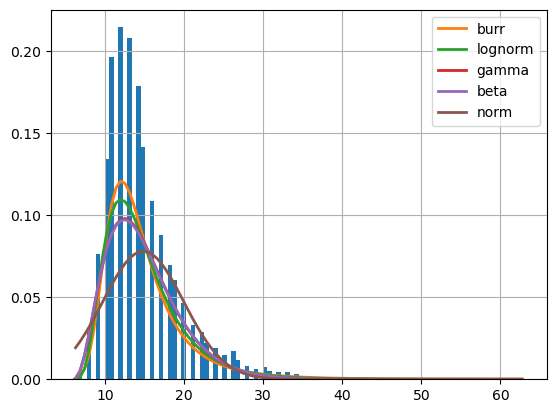

In [128]:
#Continuous distributions
f = Fitter(df_sim['e=9'].values,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()

In [39]:
from scipy.stats import nbinom, poisson, geom


x = pd.Series(df_sim['e=1'].values)
mean = x.mean()
var = x.var()
likelihoods = {}  
log_likelihoods = {}

# From the wikipedia page, we have:
# mean = pr / (1-p)
# var = pr / (1-p)**2
# without wiki, you could use MGF to get moments; too long to explain here
# Solving for p and r, we get:

# p = 1 - mean / var  # TODO: check for zero variance and limit p by [0, 1]
# r = (1-p) * mean / p

p = mean / var
r = p * mean / (1-p)

likelihoods['nbinom'] = x.map(lambda val: nbinom.pmf(val, r, p)).prod()
log_likelihoods['nbinom'] = x.map(lambda val: nbinom.logpmf(val, r, p)).sum()

lambda_ = mean
likelihoods['poisson'] = x.map(lambda val: poisson.pmf(val, lambda_)).prod()
log_likelihoods['poisson'] = x.map(lambda val: poisson.logpmf(val, lambda_)).sum()

p = 1 / mean
likelihoods['geometric'] = x.map(lambda val: geom.pmf(val, p)).prod()
log_likelihoods['geometric'] = x.map(lambda val: geom.logpmf(val, p)).sum()

best_fit = max(likelihoods, key=lambda x: likelihoods[x])
print("Best fit (regular):", best_fit)
print("Likelihood:", likelihoods[best_fit])
print("Likelihood:", likelihoods)

best_fit = max(log_likelihoods, key=lambda x: log_likelihoods[x])
print("Best fit (log):", best_fit)
print("Log likelihood:", log_likelihoods[best_fit])
print("Log likelihoods:", log_likelihoods)


Best fit (regular): nbinom
Likelihood: 1.0
Likelihood: {'nbinom': 1.0, 'poisson': 0.0, 'geometric': 0.0}
Best fit (log): nbinom
Log likelihood: 0.0
Log likelihoods: {'nbinom': 0.0, 'poisson': -18872.291284255218, 'geometric': -26301.094245738197}


In [25]:
sim9 = sim_list[8]
sim8 = sim_list[8]

for i in range(len(sim_list)):
    sim = sim_list[i]
    res = sim9.run_simulation(10000, starting_score=501, starting_credits=0, spot_darts=0, spot_points=0)

# Limit paths to turns 
for iter in range(len(e9_b1)):
    e9_b1[iter] = [x for x in e9_b1[iter] if x[2]==3]


Ran in 8.653s.


Fitting 5 distributions: 100%|██████████| 5/5 [00:00<00:00,  7.34it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,13.438319,703.991555,-66094.670046,inf,0.131787,6.651171e-152
gamma,13.438320,704.586203,-66094.669248,inf,0.131600,1.799658e-151
beta,13.438622,719.782222,-66085.234688,inf,0.131101,2.519404e-150
norm,13.440173,703.130396,-66102.500661,inf,0.140951,8.482268e-174
burr,13.448523,660.620389,-66077.869383,inf,0.139567,2.154038e-170


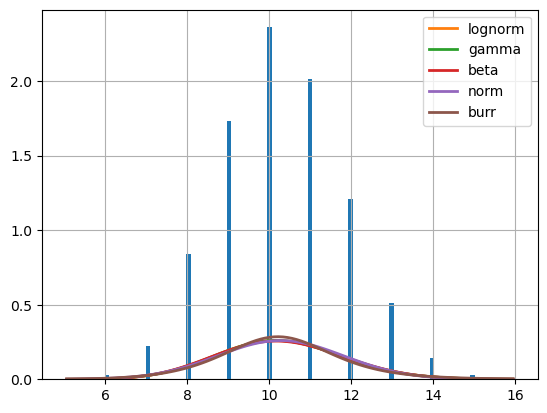

In [44]:
x = [len(x) for x in e9_b1]
x = pd.Series(x)

#Continuous distributions
f = Fitter(x.values,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()

Fitting 4 distributions: 100%|██████████| 4/4 [00:00<00:00, 10.05it/s]


----------------------------------------------------------------------------

 Beta=0
----------------------------------------------------------------------------
         sumsquare_error          aic           bic  kl_div  ks_statistic  \
lognorm         0.527739  1379.934913 -98467.307161     inf      0.090588   
gamma           0.531593  1628.857633 -98394.540695     inf      0.108910   
beta            0.532221  1602.828058 -98373.522026     inf      0.109546   
norm            0.561723  2991.568474 -97852.449664     inf      0.165904   

             ks_pvalue  
lognorm   7.384969e-72  
gamma    9.362934e-104  
beta     5.732173e-105  
norm     5.031657e-241  


Fitting 4 distributions: 100%|██████████| 4/4 [00:00<00:00, 10.91it/s]


----------------------------------------------------------------------------

 Beta=1
----------------------------------------------------------------------------
         sumsquare_error         aic           bic  kl_div  ks_statistic  \
beta           18.324744  696.128934 -62984.039653     inf      0.142271   
lognorm        18.324757  690.200964 -62993.242802     inf      0.142818   
gamma          18.324762  691.315684 -62993.240368     inf      0.142710   
norm           18.325068  689.077655 -63002.283606     inf      0.147110   

             ks_pvalue  
beta     4.505850e-177  
lognorm  1.931338e-178  
gamma    3.600903e-178  
norm     2.364041e-189  


Fitting 4 distributions: 100%|██████████| 4/4 [00:00<00:00, 13.10it/s]


----------------------------------------------------------------------------

 Beta=2
----------------------------------------------------------------------------
         sumsquare_error         aic           bic  kl_div  ks_statistic  \
lognorm        24.721491  649.876528 -59999.043365     inf      0.154788   
gamma          24.721520  650.828346 -59999.031400     inf      0.154809   
beta           24.721784  657.401929 -59989.714206     inf      0.154347   
norm           24.728450  663.309124 -60005.439129     inf      0.165044   

             ks_pvalue  
lognorm  1.068438e-209  
gamma    9.381427e-210  
beta     1.684813e-208  
norm     1.598996e-238  


Fitting 4 distributions: 100%|██████████| 4/4 [00:00<00:00, 12.82it/s]


----------------------------------------------------------------------------

 Beta=3
----------------------------------------------------------------------------
         sumsquare_error         aic           bic  kl_div  ks_statistic  \
beta           34.685686  637.949353 -56603.291334     inf      0.169388   
gamma          34.687132  624.657792 -56612.084785     inf      0.170174   
lognorm        34.687362  624.168011 -56612.018559     inf      0.170532   
norm           34.694713  650.472838 -56619.109865     inf      0.183580   

             ks_pvalue  
beta     2.669179e-251  
gamma    1.188893e-253  
lognorm  1.009165e-254  
norm     1.964586e-295  


Fitting 4 distributions: 100%|██████████| 4/4 [00:00<00:00, 14.55it/s]


----------------------------------------------------------------------------

 Beta=4
----------------------------------------------------------------------------
         sumsquare_error         aic           bic  kl_div  ks_statistic  \
beta           69.673041  479.257655 -49628.427724     inf      0.182819   
norm           69.675305  485.867260 -49646.523500     inf      0.196050   
gamma          69.675756  476.116790 -49637.248475     inf      0.185522   
lognorm        69.675882  476.246272 -49637.230431     inf      0.186058   

             ks_pvalue  
beta     5.666139e-293  
norm      0.000000e+00  
gamma    9.304541e-302  
lognorm  1.630765e-303  


Fitting 4 distributions: 100%|██████████| 4/4 [00:00<00:00, 16.58it/s]


----------------------------------------------------------------------------

 Beta=5
----------------------------------------------------------------------------
         sumsquare_error         aic           bic  kl_div  ks_statistic  \
beta           80.194524  548.334072 -48222.009993     inf      0.217038   
norm           80.195530  529.950578 -48240.305229     inf      0.208690   
gamma          80.202533  535.547224 -48230.221719     inf      0.219455   
lognorm        80.203651  533.942375 -48230.082324     inf      0.219425   

         ks_pvalue  
beta           0.0  
norm           0.0  
gamma          0.0  
lognorm        0.0  


Fitting 4 distributions: 100%|██████████| 4/4 [00:00<00:00, 18.53it/s]


----------------------------------------------------------------------------

 Beta=6
----------------------------------------------------------------------------
         sumsquare_error         aic           bic  kl_div  ks_statistic  \
norm           92.518989  746.575423 -46810.843923     inf      0.264153   
lognorm        92.522378  649.208473 -46801.267347     inf      0.247500   
gamma          92.531477  648.753414 -46800.283967     inf      0.249532   
beta           92.544868  733.644881 -46789.626543     inf      0.248875   

         ks_pvalue  
norm           0.0  
lognorm        0.0  
gamma          0.0  
beta           0.0  


Fitting 4 distributions: 100%|██████████| 4/4 [00:00<00:00, 13.07it/s]


----------------------------------------------------------------------------

 Beta=7
----------------------------------------------------------------------------
         sumsquare_error         aic           bic  kl_div  ks_statistic  \
beta          175.290256  760.523154 -40402.130287     inf      0.328862   
lognorm       175.295206  736.752877 -40411.058236     inf      0.329609   
gamma         175.308786  760.440283 -40410.283572     inf      0.329376   
norm          175.803499  989.195622 -40391.314140     inf      0.336722   

         ks_pvalue  
beta           0.0  
lognorm        0.0  
gamma          0.0  
norm           0.0  


Fitting 4 distributions: 100%|██████████| 4/4 [00:00<00:00,  8.86it/s]


----------------------------------------------------------------------------

 Beta=8
----------------------------------------------------------------------------
         sumsquare_error         aic           bic  kl_div  ks_statistic  \
norm         1744.506219  241.110099 -17442.714785     inf      0.496225   
lognorm      1744.535346  242.798652 -17433.337483     inf      0.495985   
gamma        1747.846811  229.319341 -17414.373542     inf      0.503172   
beta         1761.298493  215.301634 -17328.496397     inf      0.636453   

         ks_pvalue  
norm           0.0  
lognorm        0.0  
gamma          0.0  
beta           0.0  


Fitting 4 distributions: 100%|██████████| 4/4 [00:00<00:00, 13.68it/s]
gamma was not fitted. no parameters available


----------------------------------------------------------------------------

 Beta=9
----------------------------------------------------------------------------
         sumsquare_error  aic        bic  kl_div  ks_statistic  ks_pvalue
beta             10000.0  inf  36.841361     NaN      0.987344        0.0
lognorm          10000.0  inf  27.631021     inf      0.578621        0.0
gamma                inf  inf        inf     inf           NaN        NaN
norm                 NaN  NaN        NaN     NaN           NaN        NaN


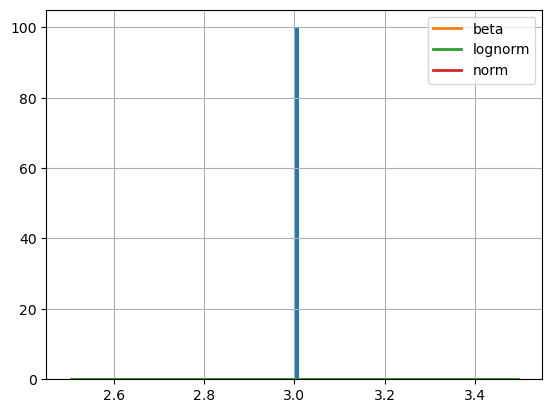

In [59]:


for beta in b_list: 

    res = e5_beta_res[beta]
    vals = [len(x) for x in res]
    x = pd.Series(vals)

    #Continuous distributions
    f = Fitter(x.values,
            distributions=['gamma',
                            'lognorm',
                            "beta",
                            #"burr",
                            "norm"])
    f.fit()
    print("----------------------------------------------------------------------------")
    print(f"\n Beta={beta}")
    print("----------------------------------------------------------------------------")

    print(f.summary())#[['ks_st'ks_pvalue']])

In [121]:
dist_paths = {}
iterations = 100000
beta_list = list(range(10))

for epsilon in epsilon_list:

    dist_paths[epsilon] = {}

    i1 = epsilon_list.index(epsilon)
    sim = sim_list[i1]

    for beta in beta_list: 

        dist_paths[epsilon][beta] = sim.run_simulation(iterations, starting_score=501, starting_credits=beta, spot_darts=0, spot_points=0)

        # Limit paths to turns 
        for iter in range(len(dist_paths[epsilon][beta])):
            dist_paths[epsilon][beta][iter] = [x for x in dist_paths[epsilon][beta][iter] if x[2]==3]

        print(f'Loop completed for epsilon={epsilon} and beta={beta}.')


# Save results to pickle so don't need to rerun every time (takes ~1 hour for 10,000 iterations)
ft.dump_pickle('dist_paths.pkl', dist_paths)


Ran 10000 iterations - 4.823s
Ran 20000 iterations - 9.376s
Ran 30000 iterations - 13.883s
Ran 40000 iterations - 18.400s
Ran 50000 iterations - 22.937s
Ran 60000 iterations - 27.471s
Ran 70000 iterations - 31.985s
Ran 80000 iterations - 36.520s
Ran 90000 iterations - 41.008s
Ran in 45.536s.
Loop completed for epsilon=1 and beta=0.
Ran 10000 iterations - 4.187s
Ran 20000 iterations - 8.452s
Ran 30000 iterations - 12.617s
Ran 40000 iterations - 16.956s
Ran 50000 iterations - 21.146s
Ran 60000 iterations - 25.362s
Ran 70000 iterations - 29.561s
Ran 80000 iterations - 33.712s
Ran 90000 iterations - 37.896s
Ran in 42.120s.
Loop completed for epsilon=1 and beta=1.
Ran 10000 iterations - 4.079s
Ran 20000 iterations - 8.199s
Ran 30000 iterations - 12.219s
Ran 40000 iterations - 16.259s
Ran 50000 iterations - 20.316s
Ran 60000 iterations - 24.374s
Ran 70000 iterations - 28.425s
Ran 80000 iterations - 32.497s
Ran 90000 iterations - 38.332s
Ran in 42.450s.
Loop completed for epsilon=1 and beta=2

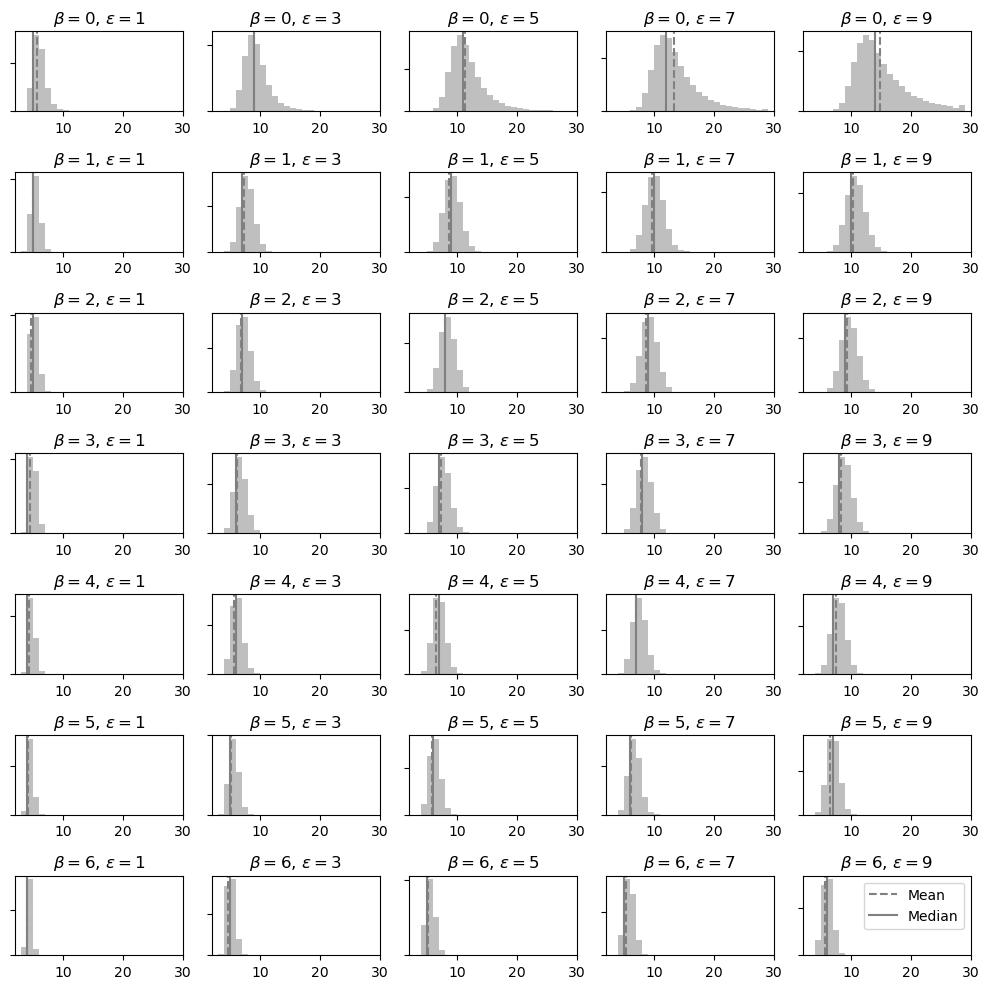

In [130]:

xmin = 2
xmax = 30

reduced_epsilon_list = [1,3,5,7,9]
reduced_beta_list = [0,1,2,3,4,5,6]

fig, ax = plt.subplots(len(reduced_beta_list), len(reduced_epsilon_list), figsize=(10,10))

sim_lengths = []
vmax=max(epsilon_list)
vmin=min(epsilon_list)

handicap_list = ['spot_point_heuristic','spot_point_optimal','dynamic_credits']

for epsilon_index in range(len(reduced_epsilon_list)):

    epsilon = reduced_epsilon_list[epsilon_index]

    for beta in reduced_beta_list:
        
            data1 = [len(x) for x in dist_paths[epsilon][beta]]
            #color1 = color_map_color(e1, cmap_name='gist_rainbow', vmin=vmin, vmax=vmax)
            color1='grey'

            # Plot baseline 
            ax[beta,epsilon_index].hist(np.array(data1),color=color1,alpha=0.5,bins=list(range(1,30)))
            ax[beta,epsilon_index].axvline(statistics.mean(data1),color=color1,linestyle='dashed')
            ax[beta,epsilon_index].axvline(statistics.median(data1),color=color1)

            # f = Fitter(data1,distributions=get_common_distributions())
            # f.fit()
            # name = list(f.get_best().keys())[0]

            ax[beta,epsilon_index].set_xlim((xmin,xmax))
            ax[beta,epsilon_index].title.set_text(fr'$\beta=${beta}, $\epsilon=${epsilon}')
            # ax[beta,epsilon_index].set_xlabel(f'Best = {name}',fontsize=6)
            ax[beta,epsilon_index].set_yticklabels([])

            plt.legend([f'Mean','Median'])


fig.tight_layout()

Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  5.19it/s]


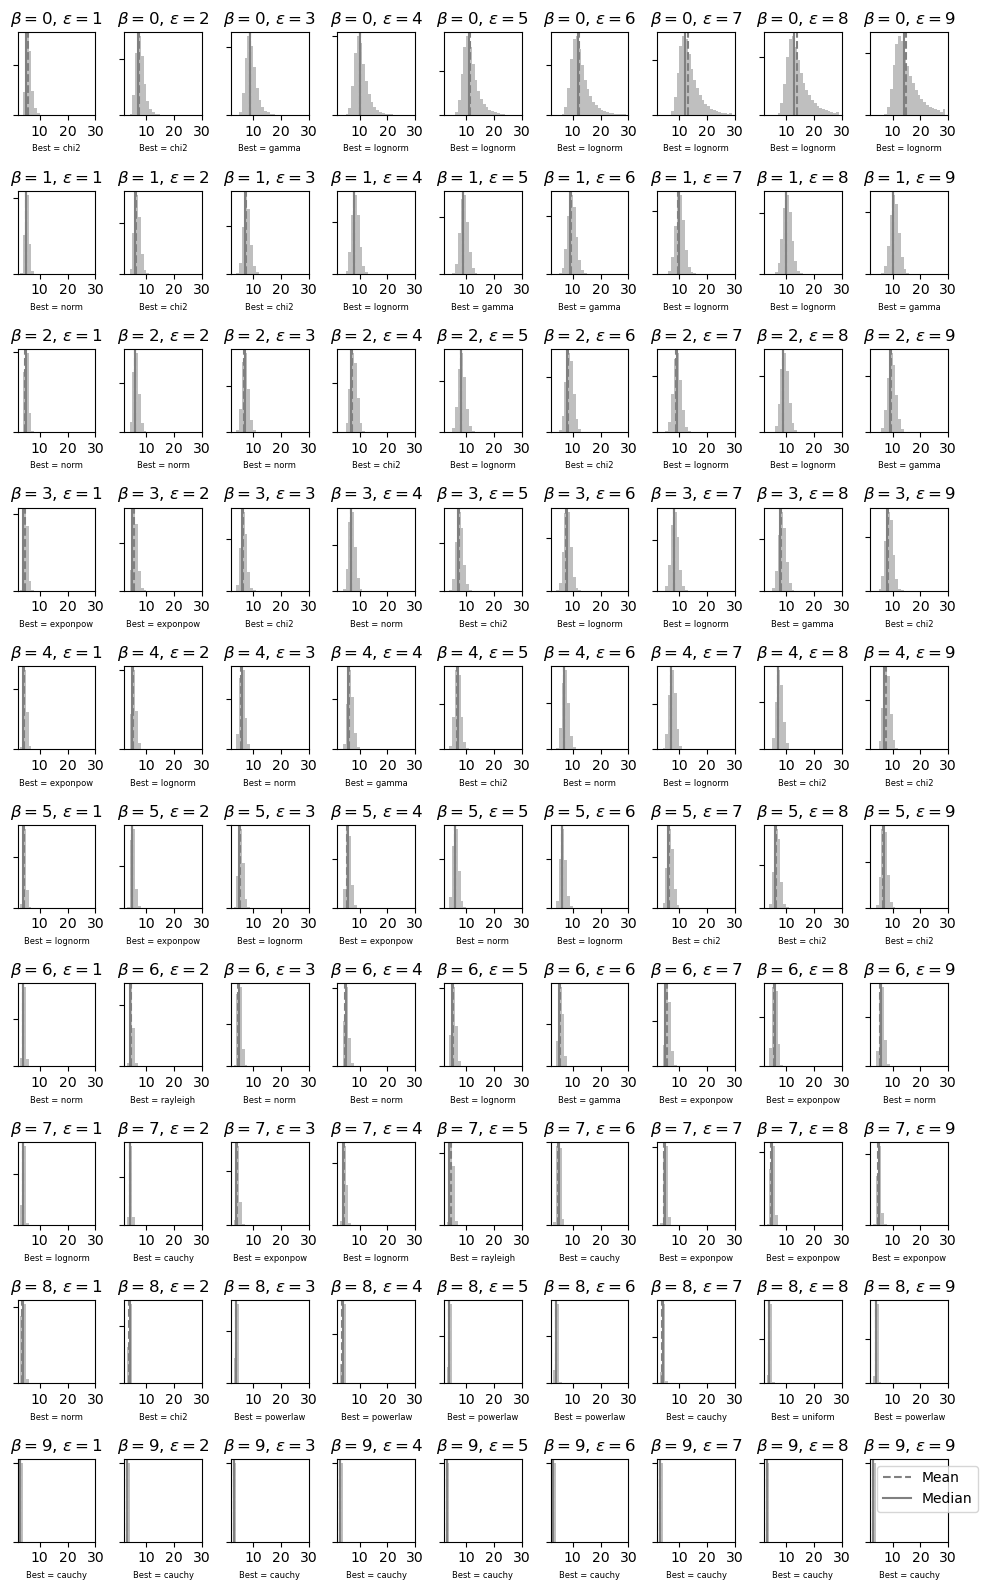

In [125]:

xmin = 2
xmax = 30
num_rows = len(epsilon_list) - stronger_e

fig, ax = plt.subplots(len(beta_list), len(epsilon_list), figsize=(10,num_rows*2))

sim_lengths = []
vmax=max(epsilon_list)
vmin=min(epsilon_list)

handicap_list = ['spot_point_heuristic','spot_point_optimal','dynamic_credits']

row = 0 

for epsilon_index in range(len(epsilon_list)):

    epsilon = epsilon_list[epsilon_index]

    for beta in beta_list:
        
            data1 = [len(x) for x in dist_paths[epsilon][beta]]
            #color1 = color_map_color(e1, cmap_name='gist_rainbow', vmin=vmin, vmax=vmax)
            color1='grey'

            # Plot baseline 
            ax[beta,epsilon_index].hist(np.array(data1),color=color1,alpha=0.5,bins=list(range(1,30)))
            ax[beta,epsilon_index].axvline(statistics.mean(data1),color=color1,linestyle='dashed')
            ax[beta,epsilon_index].axvline(statistics.median(data1),color=color1)

            f = Fitter(data1,distributions=get_common_distributions())
            f.fit()
            name = list(f.get_best('ks_statistic').keys())[0]

            ax[beta,epsilon_index].set_xlim((xmin,xmax))
            ax[beta,epsilon_index].title.set_text(fr'$\beta=${beta}, $\epsilon=${epsilon}')
            ax[beta,epsilon_index].set_xlabel(f'Best = {name}',fontsize=6)
            ax[beta,epsilon_index].set_yticklabels([])

            plt.legend([f'Mean','Median'])


fig.tight_layout()

Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  5.38it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,9.387791,1642.794009,-927317.001817,inf,0.199996,0.0
chi2,9.394918,1930.407169,-927241.121340,inf,0.199609,0.0
gamma,9.394918,1930.406636,-927241.120777,inf,0.199609,0.0
norm,9.471746,4486.170292,-926438.199700,inf,0.223802,0.0
rayleigh,9.568450,2056.252617,-925422.396037,inf,0.276657,0.0


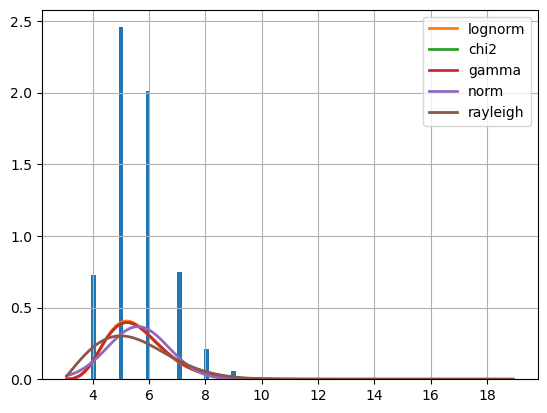

In [124]:
data1 = [len(x) for x in dist_paths[1][0]]
#color1 = color_map_color(e1, cmap_name='gist_rainbow', vmin=vmin, vmax=vmax)
color1='grey'

# Plot baseline 
plt.hist(np.array(data1),color=color1,alpha=0.5,bins=list(range(1,30)))
plt.axvline(statistics.mean(data1),color=color1,linestyle='dashed')
plt.axvline(statistics.median(data1),color=color1)

f = Fitter(data1,
        distributions=get_common_distributions())

f.fit()
f.summary()



Fitting 1 distributions: 100%|██████████| 1/1 [00:00<00:00,  5.70it/s]


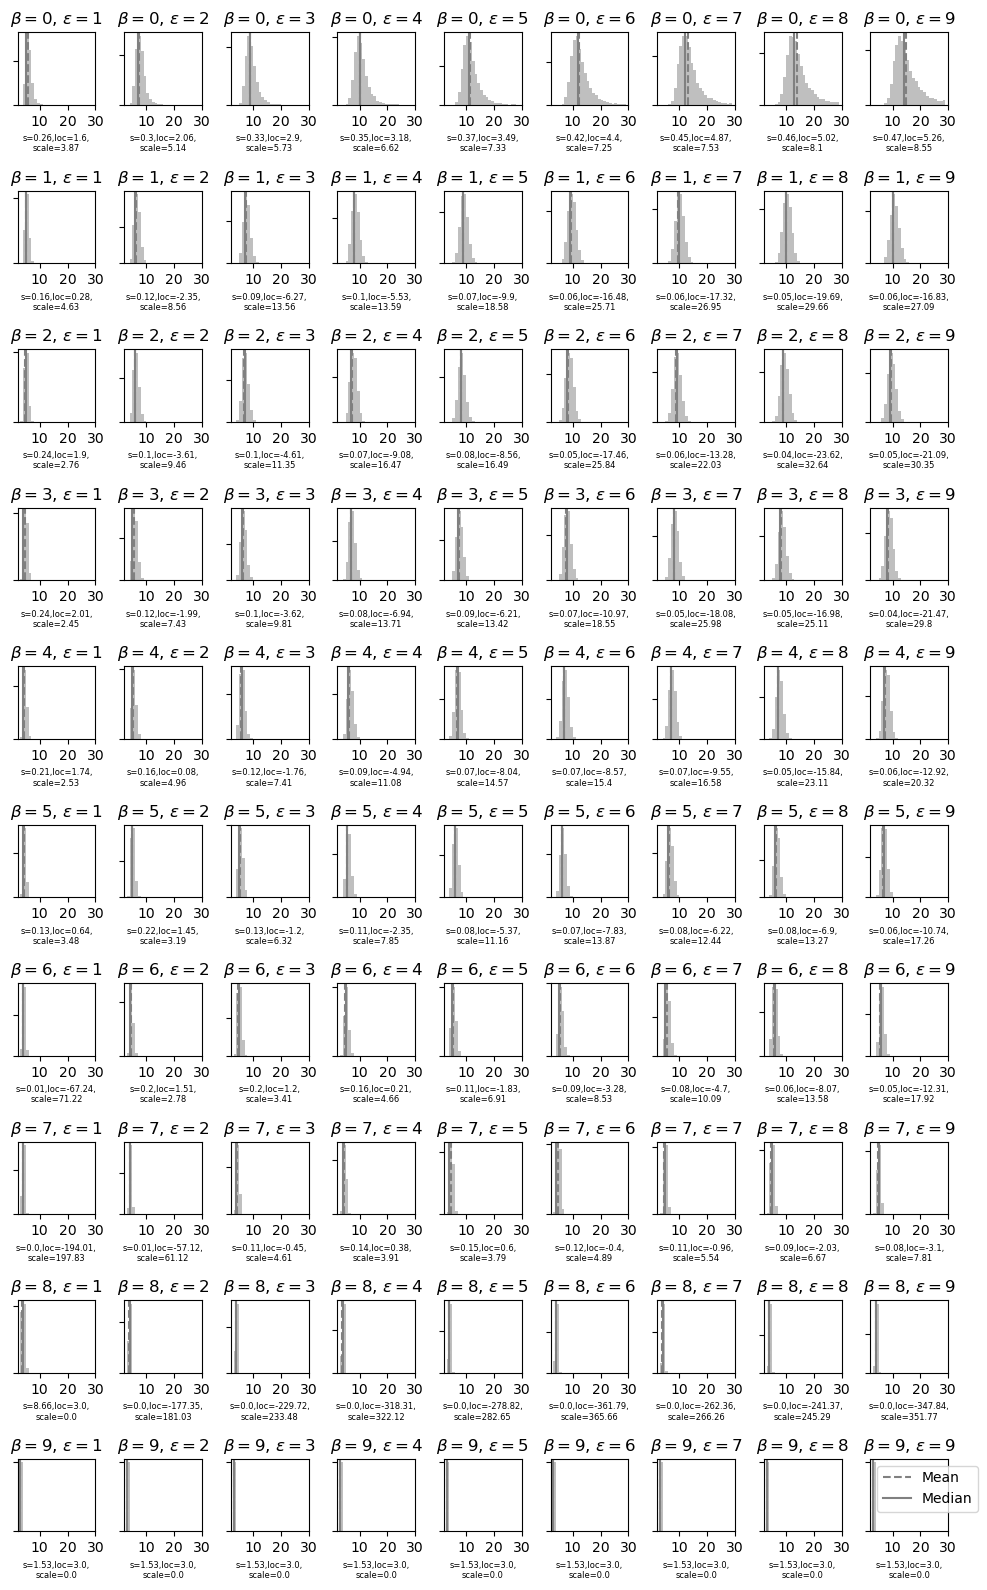

In [120]:

xmin = 2
xmax = 30
num_rows = len(epsilon_list) - stronger_e

fig, ax = plt.subplots(len(beta_list), len(epsilon_list), figsize=(10,num_rows*2))

sim_lengths = []
vmax=max(epsilon_list)
vmin=min(epsilon_list)

handicap_list = ['spot_point_heuristic','spot_point_optimal','dynamic_credits']

row = 0 

for epsilon_index in range(len(epsilon_list)):

    epsilon = epsilon_list[epsilon_index]

    for beta in beta_list:
        
            data1 = [len(x) for x in dist_paths[epsilon][beta]]
            #color1 = color_map_color(e1, cmap_name='gist_rainbow', vmin=vmin, vmax=vmax)
            color1='grey'

            # Plot baseline 
            ax[beta,epsilon_index].hist(np.array(data1),color=color1,alpha=0.5,bins=list(range(1,30)))
            ax[beta,epsilon_index].axvline(statistics.mean(data1),color=color1,linestyle='dashed')
            ax[beta,epsilon_index].axvline(statistics.median(data1),color=color1)

            f = Fitter(data1,distributions=['lognorm'])
            f.fit()
            name = list(f.get_best().keys())[0]
            p_s = round(f.get_best()['lognorm']['s'],2)
            p_loc = round(f.get_best()['lognorm']['loc'],2)
            p_scale = round(f.get_best()['lognorm']['scale'],2)

            ax[beta,epsilon_index].set_xlim((xmin,xmax))
            ax[beta,epsilon_index].title.set_text(fr'$\beta=${beta}, $\epsilon=${epsilon}')
            ax[beta,epsilon_index].set_xlabel(f'Best = {name}',fontsize=6)
            ax[beta,epsilon_index].set_xlabel(f's={p_s},loc={p_loc},\nscale={p_scale}',fontsize=6)
            
            ax[beta,epsilon_index].set_yticklabels([])

            plt.legend([f'Mean','Median'])


fig.tight_layout()

In [117]:
p_s = round(f.get_best()['lognorm']['s'],2)
p_loc = round(f.get_best()['lognorm']['loc'],2)
p_scale = round(f.get_best()['lognorm']['scale'],2)

print(f's={p_s},loc={p_loc},\nscale={p_scale}')

s=1.53,loc=3.0,
scale=0.0
